## United States Mortality Rates by County 1980-2014

IHME research applied a novel methodology to death registration data from the National Vital Statistics System (NVSS) in order to estimate annual county-level mortality rates for 21 mutually exclusive causes of death. This dataset provides estimates for cause-specific age-standardized mortality rates at the county level for each state, the District of Columbia, and the United States as a whole for 1980-2014 (quinquennial), as well as the changes in rates during this period. Also included are data on the 10 counties with the highest and lowest mortality rates for each cause in 2014. Study results were published in JAMA in December 2016 in "US county-level trends in mortality rates for major causes of death, 1980–2014."

#### Link:- http://ghdx.healthdata.org/record/united-states-mortality-rates-county-1980-2014

# This Notebook Will have three parts

## Data Cleaning, Where we will clean and preprocess the data for the further steps

## EDA-Exploratory Data Analysis

## PDA-Predictive Data Analysis

--------------------------------------------------------------------------------------------------------------------------

## Data Cleaning and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('IHME_USA_COUNTY_MORTALITY_RATES_1980_2014_NATIONAL_Y2016M12D13.XLSX')

In [3]:
df.head()

,HIV/AIDS and tuberculosis,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
1,United States,NaN,"1.52 (1.44, 1.61)","3.16 (3.11, 3.22)","11.45 (11.34, 11.56)","16.61 (16.48, 16.74)","5.97 (5.92, 6.02)","4.87 (4.83, 4.91)","3.20 (3.17, 3.22)","2.66 (2.63, 2.69)","74.35 (64.77, 84.14)"
2,Alabama,1,"1.46 (1.33, 1.59)","2.15 (2.03, 2.27)","8.03 (7.79, 8.25)","14.10 (13.76, 14.43)","5.47 (5.30, 5.65)","4.67 (4.51, 4.83)","3.35 (3.21, 3.50)","2.94 (2.80, 3.08)","101.52 (82.33, 124.12)"
3,"Autauga County, Alabama",1001,"0.95 (0.68, 1.29)","1.44 (1.12, 1.86)","6.57 (5.49, 7.84)","10.75 (9.18, 12.50)","3.62 (2.94, 4.37)","3.32 (2.66, 4.14)","2.37 (1.82, 3.07)","2.30 (1.68, 2.96)","143.15 (65.10, 245.14)"
4,"Baldwin County, Alabama",1003,"0.84 (0.63, 1.12)","1.44 (1.18, 1.75)","6.51 (5.71, 7.40)","11.18 (9.89, 12.59)","3.82 (3.28, 4.44)","3.18 (2.71, 3.72)","2.27 (1.88, 2.72)","2.01 (1.64, 2.46)","138.20 (69.82, 240.56)"


#### Here column heading needs to be adjusted , so first we should fix this and then proceed

In [4]:
d = df[:1]

In [5]:
d

,HIV/AIDS and tuberculosis,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"


In [6]:
d.columns

Index(['HIV/AIDS and tuberculosis', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [7]:
for row in d.iterrows():
    _,data = row
    col = data.tolist()
    break


In [8]:
df.columns = data

In [9]:
df.head()

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
0,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
1,United States,NaN,"1.52 (1.44, 1.61)","3.16 (3.11, 3.22)","11.45 (11.34, 11.56)","16.61 (16.48, 16.74)","5.97 (5.92, 6.02)","4.87 (4.83, 4.91)","3.20 (3.17, 3.22)","2.66 (2.63, 2.69)","74.35 (64.77, 84.14)"
2,Alabama,1,"1.46 (1.33, 1.59)","2.15 (2.03, 2.27)","8.03 (7.79, 8.25)","14.10 (13.76, 14.43)","5.47 (5.30, 5.65)","4.67 (4.51, 4.83)","3.35 (3.21, 3.50)","2.94 (2.80, 3.08)","101.52 (82.33, 124.12)"
3,"Autauga County, Alabama",1001,"0.95 (0.68, 1.29)","1.44 (1.12, 1.86)","6.57 (5.49, 7.84)","10.75 (9.18, 12.50)","3.62 (2.94, 4.37)","3.32 (2.66, 4.14)","2.37 (1.82, 3.07)","2.30 (1.68, 2.96)","143.15 (65.10, 245.14)"
4,"Baldwin County, Alabama",1003,"0.84 (0.63, 1.12)","1.44 (1.18, 1.75)","6.51 (5.71, 7.40)","11.18 (9.89, 12.59)","3.82 (3.28, 4.44)","3.18 (2.71, 3.72)","2.27 (1.88, 2.72)","2.01 (1.64, 2.46)","138.20 (69.82, 240.56)"


#### Now we must remove the data which we wont be using

In [10]:
df.drop(df.index[3196],inplace=True)
df.drop(df.index[3195], inplace=True)
df.drop(df.index[1],inplace=True)
df.drop(df.index[0],inplace=True)


In [11]:
df

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
2,Alabama,1,"1.46 (1.33, 1.59)","2.15 (2.03, 2.27)","8.03 (7.79, 8.25)","14.10 (13.76, 14.43)","5.47 (5.30, 5.65)","4.67 (4.51, 4.83)","3.35 (3.21, 3.50)","2.94 (2.80, 3.08)","101.52 (82.33, 124.12)"
3,"Autauga County, Alabama",1001,"0.95 (0.68, 1.29)","1.44 (1.12, 1.86)","6.57 (5.49, 7.84)","10.75 (9.18, 12.50)","3.62 (2.94, 4.37)","3.32 (2.66, 4.14)","2.37 (1.82, 3.07)","2.30 (1.68, 2.96)","143.15 (65.10, 245.14)"
4,"Baldwin County, Alabama",1003,"0.84 (0.63, 1.12)","1.44 (1.18, 1.75)","6.51 (5.71, 7.40)","11.18 (9.89, 12.59)","3.82 (3.28, 4.44)","3.18 (2.71, 3.72)","2.27 (1.88, 2.72)","2.01 (1.64, 2.46)","138.20 (69.82, 240.56)"
5,"Barbour County, Alabama",1005,"1.11 (0.82, 1.48)","1.81 (1.43, 2.27)","7.86 (6.66, 9.25)","15.65 (13.49, 18.12)","6.33 (5.23, 7.50)","6.19 (5.08, 7.50)","4.67 (3.66, 5.82)","4.45 (3.42, 5.65)","299.22 (179.11, 466.28)"
6,"Bibb County, Alabama",1007,"0.88 (0.59, 1.26)","1.21 (0.88, 1.60)","5.13 (4.06, 6.25)","9.69 (7.92, 11.75)","2.89 (2.24, 3.73)","2.65 (1.96, 3.52)","1.74 (1.22, 2.40)","1.51 (1.02, 2.13)","70.64 (11.50, 161.85)"
7,"Blount County, Alabama",1009,"1.08 (0.76, 1.53)","1.24 (0.94, 1.64)","4.66 (3.78, 5.64)","8.50 (7.13, 10.05)","2.71 (2.16, 3.38)","2.33 (1.77, 2.96)","1.48 (1.07, 1.97)","1.31 (0.93, 1.77)","21.27 (-19.96, 82.00)"
8,"Bullock County, Alabama",1011,"1.48 (1.04, 2.01)","2.53 (1.90, 3.24)","11.13 (9.19, 13.41)","20.31 (16.99, 24.05)","7.63 (6.01, 9.44)","7.05 (5.39, 8.97)","5.10 (3.78, 6.74)","4.45 (3.23, 6.10)","201.47 (110.93, 341.46)"
9,"Butler County, Alabama",1013,"1.30 (0.91, 1.77)","2.04 (1.52, 2.60)","8.75 (7.26, 10.47)","15.09 (12.75, 17.75)","5.89 (4.75, 7.26)","5.60 (4.33, 7.01)","4.09 (3.04, 5.25)","3.68 (2.67, 4.82)","182.00 (90.99, 323.86)"
10,"Calhoun County, Alabama",1015,"1.98 (1.46, 2.67)","2.38 (1.89, 2.99)","8.09 (6.94, 9.25)","14.09 (12.57, 15.85)","4.66 (3.96, 5.48)","3.98 (3.27, 4.83)","2.55 (2.03, 3.21)","2.10 (1.63, 2.67)","5.91 (-27.68, 57.53)"
11,"Chambers County, Alabama",1017,"1.40 (1.02, 1.91)","2.44 (1.96, 2.99)","10.03 (8.53, 11.67)","17.45 (15.20, 19.79)","6.82 (5.69, 7.99)","6.03 (4.89, 7.40)","4.41 (3.47, 5.55)","3.85 (2.97, 4.92)","175.50 (91.49, 285.29)"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 2 to 3194
Data columns (total 11 columns):
Location                                 3193 non-null object
FIPS                                     3193 non-null object
Mortality Rate, 1980*                    3193 non-null object
Mortality Rate, 1985*                    3193 non-null object
Mortality Rate, 1990*                    3193 non-null object
Mortality Rate, 1995*                    3193 non-null object
Mortality Rate, 2000*                    3193 non-null object
Mortality Rate, 2005*                    3193 non-null object
Mortality Rate, 2010*                    3193 non-null object
Mortality Rate, 2014*                    3193 non-null object
% Change in Mortality Rate, 1980-2014    3193 non-null object
dtypes: object(11)
memory usage: 299.3+ KB


#### We must separate some of the columns and make new to perform analysis

In [13]:
def separateState(cols):
    data = cols.split(',')
    if len(data)==1:
        return data[0].strip()
    else:
        return data[1].strip()
    
def separateCounty(cols):
    return cols.split(',')[0].strip()

In [14]:
df['State'] = df['Location'].apply(separateState)

In [15]:
df['Location'] = df['Location'].apply(separateCounty)

In [16]:
df

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014",State
2,Alabama,1,"1.46 (1.33, 1.59)","2.15 (2.03, 2.27)","8.03 (7.79, 8.25)","14.10 (13.76, 14.43)","5.47 (5.30, 5.65)","4.67 (4.51, 4.83)","3.35 (3.21, 3.50)","2.94 (2.80, 3.08)","101.52 (82.33, 124.12)",Alabama
3,Autauga County,1001,"0.95 (0.68, 1.29)","1.44 (1.12, 1.86)","6.57 (5.49, 7.84)","10.75 (9.18, 12.50)","3.62 (2.94, 4.37)","3.32 (2.66, 4.14)","2.37 (1.82, 3.07)","2.30 (1.68, 2.96)","143.15 (65.10, 245.14)",Alabama
4,Baldwin County,1003,"0.84 (0.63, 1.12)","1.44 (1.18, 1.75)","6.51 (5.71, 7.40)","11.18 (9.89, 12.59)","3.82 (3.28, 4.44)","3.18 (2.71, 3.72)","2.27 (1.88, 2.72)","2.01 (1.64, 2.46)","138.20 (69.82, 240.56)",Alabama
5,Barbour County,1005,"1.11 (0.82, 1.48)","1.81 (1.43, 2.27)","7.86 (6.66, 9.25)","15.65 (13.49, 18.12)","6.33 (5.23, 7.50)","6.19 (5.08, 7.50)","4.67 (3.66, 5.82)","4.45 (3.42, 5.65)","299.22 (179.11, 466.28)",Alabama
6,Bibb County,1007,"0.88 (0.59, 1.26)","1.21 (0.88, 1.60)","5.13 (4.06, 6.25)","9.69 (7.92, 11.75)","2.89 (2.24, 3.73)","2.65 (1.96, 3.52)","1.74 (1.22, 2.40)","1.51 (1.02, 2.13)","70.64 (11.50, 161.85)",Alabama
7,Blount County,1009,"1.08 (0.76, 1.53)","1.24 (0.94, 1.64)","4.66 (3.78, 5.64)","8.50 (7.13, 10.05)","2.71 (2.16, 3.38)","2.33 (1.77, 2.96)","1.48 (1.07, 1.97)","1.31 (0.93, 1.77)","21.27 (-19.96, 82.00)",Alabama
8,Bullock County,1011,"1.48 (1.04, 2.01)","2.53 (1.90, 3.24)","11.13 (9.19, 13.41)","20.31 (16.99, 24.05)","7.63 (6.01, 9.44)","7.05 (5.39, 8.97)","5.10 (3.78, 6.74)","4.45 (3.23, 6.10)","201.47 (110.93, 341.46)",Alabama
9,Butler County,1013,"1.30 (0.91, 1.77)","2.04 (1.52, 2.60)","8.75 (7.26, 10.47)","15.09 (12.75, 17.75)","5.89 (4.75, 7.26)","5.60 (4.33, 7.01)","4.09 (3.04, 5.25)","3.68 (2.67, 4.82)","182.00 (90.99, 323.86)",Alabama
10,Calhoun County,1015,"1.98 (1.46, 2.67)","2.38 (1.89, 2.99)","8.09 (6.94, 9.25)","14.09 (12.57, 15.85)","4.66 (3.96, 5.48)","3.98 (3.27, 4.83)","2.55 (2.03, 3.21)","2.10 (1.63, 2.67)","5.91 (-27.68, 57.53)",Alabama
11,Chambers County,1017,"1.40 (1.02, 1.91)","2.44 (1.96, 2.99)","10.03 (8.53, 11.67)","17.45 (15.20, 19.79)","6.82 (5.69, 7.99)","6.03 (4.89, 7.40)","4.41 (3.47, 5.55)","3.85 (2.97, 4.92)","175.50 (91.49, 285.29)",Alabama


#### We have added a new 'State' Column and we have also updated the Location

In [17]:
def separateLowerBounds(var):
    data = var.split('(')
    return float(data[1].split(',')[0])
    #print(data[1].split(',')[1][:-1])
    
def separateUpperBounds(var):
    data = var.split('(')
    return float(data[1].split(',')[1][:-1])

def separateAverage(var):
    return float(var.split('(')[0])

In [18]:
df.columns

Index(['Location', 'FIPS', 'Mortality Rate, 1980*', 'Mortality Rate, 1985*',
       'Mortality Rate, 1990*', 'Mortality Rate, 1995*',
       'Mortality Rate, 2000*', 'Mortality Rate, 2005*',
       'Mortality Rate, 2010*', 'Mortality Rate, 2014*',
       '% Change in Mortality Rate, 1980-2014', 'State'],
      dtype='object', name=0)

In [19]:
cols = df.columns[2:-1]

In [20]:
cols

Index(['Mortality Rate, 1980*', 'Mortality Rate, 1985*',
       'Mortality Rate, 1990*', 'Mortality Rate, 1995*',
       'Mortality Rate, 2000*', 'Mortality Rate, 2005*',
       'Mortality Rate, 2010*', 'Mortality Rate, 2014*',
       '% Change in Mortality Rate, 1980-2014'],
      dtype='object', name=0)

In [21]:
for i in cols:
    df[i+'-lower'] = df[i].apply(separateLowerBounds)
    df[i+'-upper'] = df[i].apply(separateUpperBounds)
    df[i] = df[i].apply(separateAverage)

In [22]:
df.columns

Index(['Location', 'FIPS', 'Mortality Rate, 1980*', 'Mortality Rate, 1985*',
       'Mortality Rate, 1990*', 'Mortality Rate, 1995*',
       'Mortality Rate, 2000*', 'Mortality Rate, 2005*',
       'Mortality Rate, 2010*', 'Mortality Rate, 2014*',
       '% Change in Mortality Rate, 1980-2014', 'State',
       'Mortality Rate, 1980*-lower', 'Mortality Rate, 1980*-upper',
       'Mortality Rate, 1985*-lower', 'Mortality Rate, 1985*-upper',
       'Mortality Rate, 1990*-lower', 'Mortality Rate, 1990*-upper',
       'Mortality Rate, 1995*-lower', 'Mortality Rate, 1995*-upper',
       'Mortality Rate, 2000*-lower', 'Mortality Rate, 2000*-upper',
       'Mortality Rate, 2005*-lower', 'Mortality Rate, 2005*-upper',
       'Mortality Rate, 2010*-lower', 'Mortality Rate, 2010*-upper',
       'Mortality Rate, 2014*-lower', 'Mortality Rate, 2014*-upper',
       '% Change in Mortality Rate, 1980-2014-lower',
       '% Change in Mortality Rate, 1980-2014-upper'],
      dtype='object', name=0)

#### We have introducued new columns which might play a vital role while doing predictive analysis or applying machine learning

-------------------------------------------------------------------------------------------------------------------

## EDA-Exploratory Data Analysis

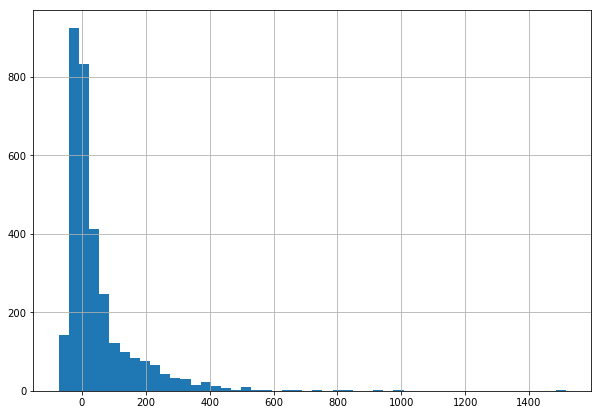

In [23]:
df['% Change in Mortality Rate, 1980-2014'].hist(bins=50, xlabelsize=10,figsize=(10,7))

Here we can observe that most of the percentage change is near to zeros

In [24]:
df2 = df[df['% Change in Mortality Rate, 1980-2014']<=0].groupby('State')['% Change in Mortality Rate, 1980-2014'].mean()

In [25]:
df3 = df[df['% Change in Mortality Rate, 1980-2014']>0].groupby('State')['% Change in Mortality Rate, 1980-2014'].mean()

In [26]:
df4 = df.groupby('State')['% Change in Mortality Rate, 1980-2014'].mean()

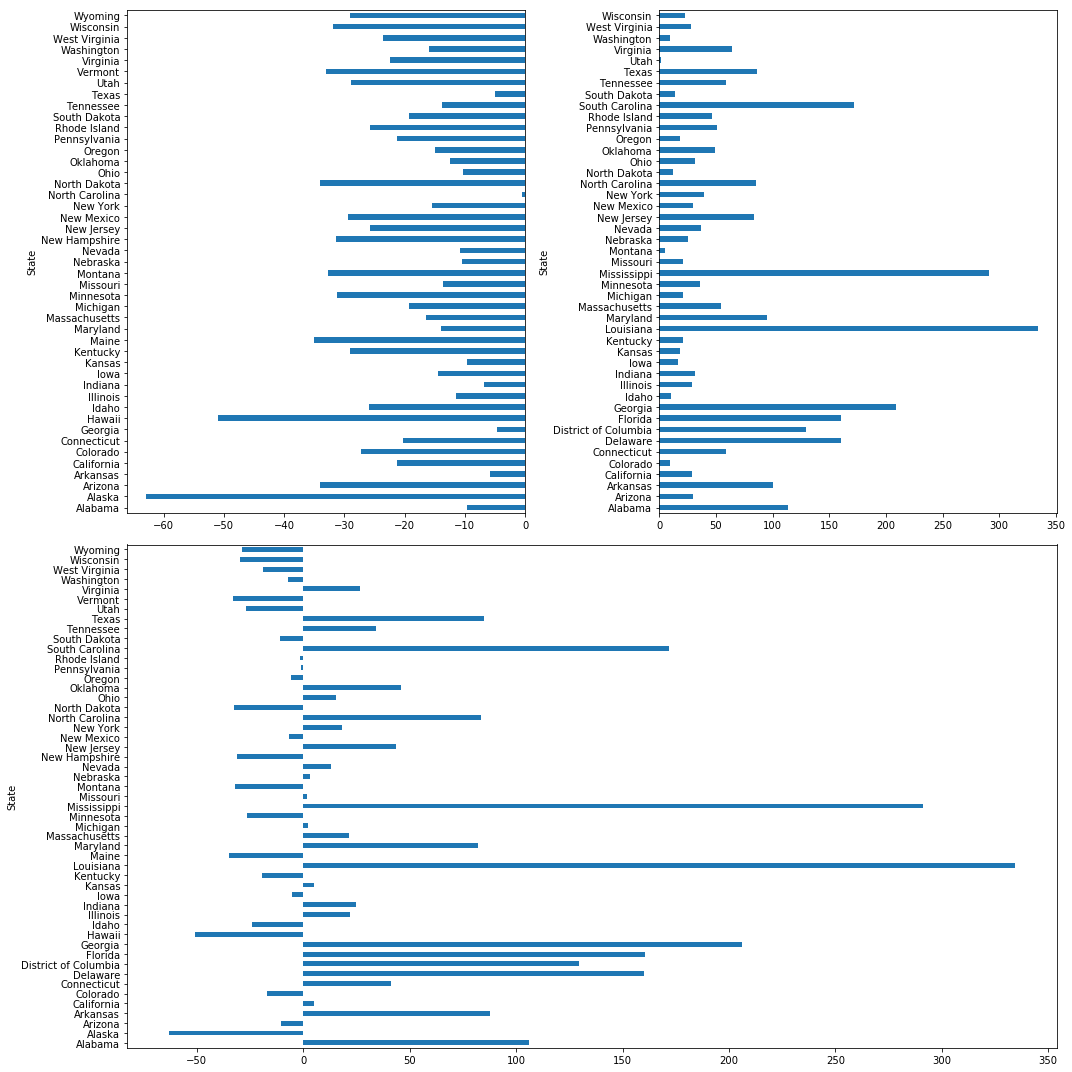

In [27]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)
df2.plot(kind = 'barh', ax=ax1)
df3.plot(kind = 'barh', ax=ax2)
df4.plot(kind = 'barh', ax=ax3)
plt.tight_layout()

Here we can straight away compare the percentage change in each state, for example here in the 3rd plot we can see Mississippi(Second highest) and Maine(Highest) has a large positive bar but if we look at the 1st and the 2nd plot we can see that Mississippi doesnot have any negative change but Maine has.

----------------------------------------------------------------------------------------------------------------

## PDA-Predictive Data Analysis

Here we can see that its a time series problem, that is we are observing how with time a particular variable is changing.

Such problems are best handled with RNN(Recurrent Neural Network) or LSTM (Long Short Term Memory), with the name only we can understand that these models understands the trend and and tries to mimics the trend.

Using this we can predict what we can expect in future for the mortality rate.

This problem can also be resolved by collecting more data about the GDP and Literacy rate or Education standard.
Since this analysis is for HIV/AIDS/Tuberculosis victims. We can collect the data which defines the economic condition of the state or the county.

GDP contribution from the place, literacy rate can add value to the existing records, as it might be a case places with high literacy rate have good education system and they are well versed with the prevention methods or the place which contributes the most to GDP will have a goof education system, people there might be in a good job and less people tend to die early or probability of dying from some disease less.

Then this problem can be solved with other deep learning algorithms.
we might cluster the places with same type of trend or we also might define some cost function which punishes the optimization steps and make them move in the correct direction.